# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [250]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

## load the data sets

In [167]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [168]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [169]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

In [170]:
# Q1: Can you draw a bar chart for the most visited countries by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim

<function matplotlib.pyplot.show(close=None, block=None)>

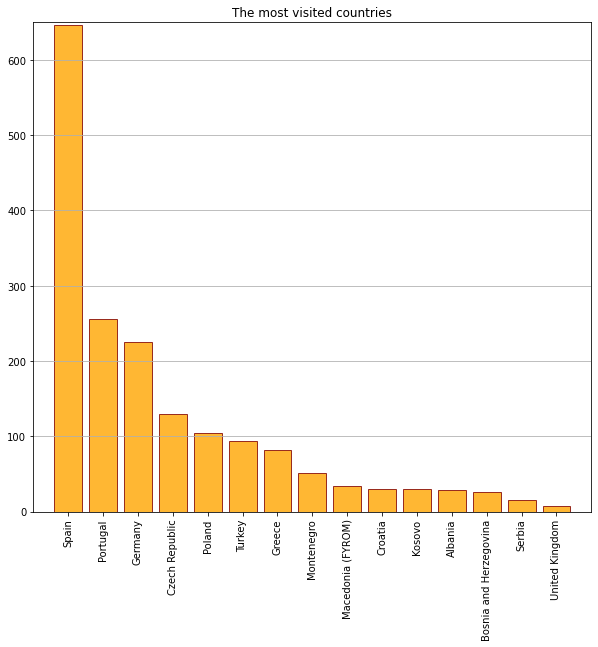

In [171]:
df['country'].value_counts().plot(kind="bar",title="The most visited countries",figsize=(10,9),alpha=0.8, width=0.8, color="orange", edgecolor="maroon",lw=1)
plt.xlim(-1,15)
plt.ylim(0,650)
plt.grid(b=True, axis='y') 
plt.show

In [172]:
con_num=df['country'].value_counts()
con_num

Spain                     646
Portugal                  256
Germany                   225
Czech Republic            130
Poland                    104
Turkey                     94
Greece                     82
Montenegro                 51
Macedonia (FYROM)          34
Croatia                    30
Kosovo                     30
Albania                    29
Bosnia and Herzegovina     26
Serbia                     15
United Kingdom              7
Name: country, dtype: int64

Now you try: re-create the plot above, but make the bars orange with maroon edges.

In [173]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries

<function matplotlib.pyplot.show(close=None, block=None)>

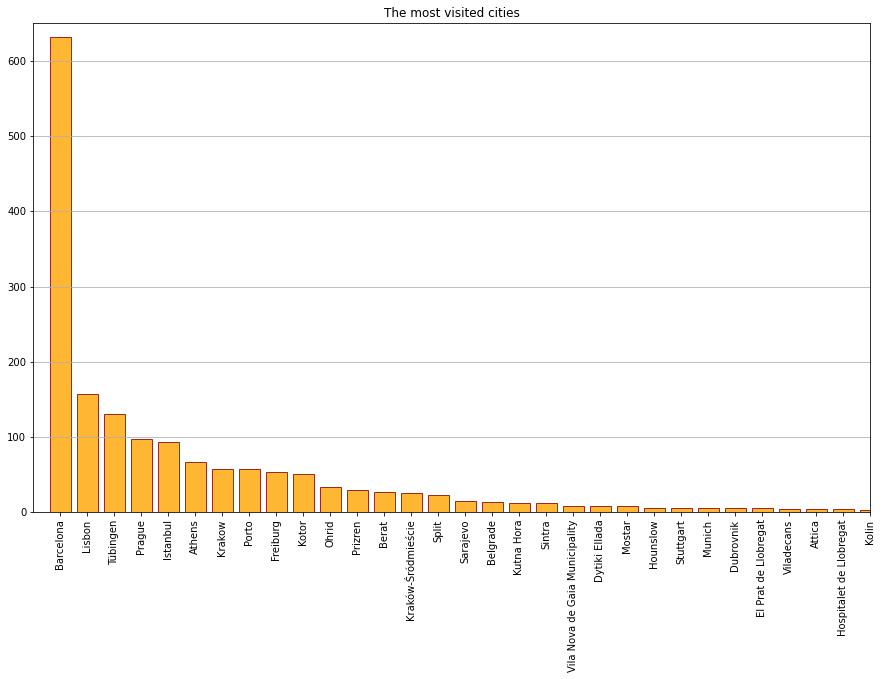

In [174]:
df['city'].value_counts().plot(kind="bar",title="The most visited cities",figsize=(15,9),alpha=0.8, width=0.8, color="orange", edgecolor="maroon", lw=1)
plt.xlim(-1,30)
plt.ylim(0,650)
plt.grid(b=True, axis='y') 
plt.show

## Next: scatter plots as simple maps

In [175]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 

<function matplotlib.pyplot.show(close=None, block=None)>

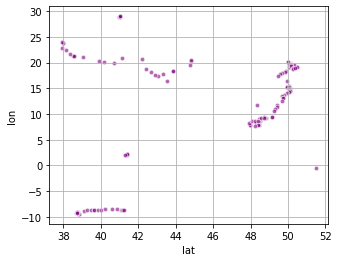

In [176]:
rs.plot(kind="scatter",x="lat",y="lon",figsize=(5,4),color="purple",edgecolor="white",alpha=0.6,s=20)
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

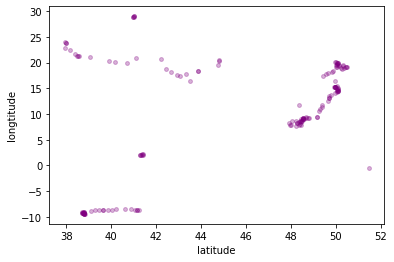

In [177]:
fig,ax=plt.subplots()
ax.scatter(rs["lat"],rs["lon"],c="purple",alpha=0.3,s=15)
ax.set_xlabel("latitude")
ax.set_ylabel("longtitude")
plt.show

## Line charts, with annotation

In [178]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

In [179]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 

<function matplotlib.pyplot.show(close=None, block=None)>

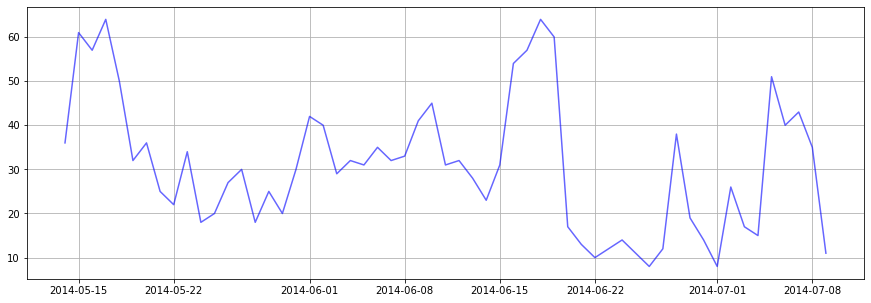

In [180]:
countdata.plot(kind="line",figsize=(15,5),color="blue",alpha=0.6)
plt.grid()
plt.show

In [181]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

In [182]:
cd = pd.DataFrame(countdata)
cd.columns=["count"]

/var/folders/9_/0m10cd4j1x11ddwhq6hwrm500000gn/T/ipykernel_34087/431388751.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cd.index,rotation=90)


<function matplotlib.pyplot.show(close=None, block=None)>

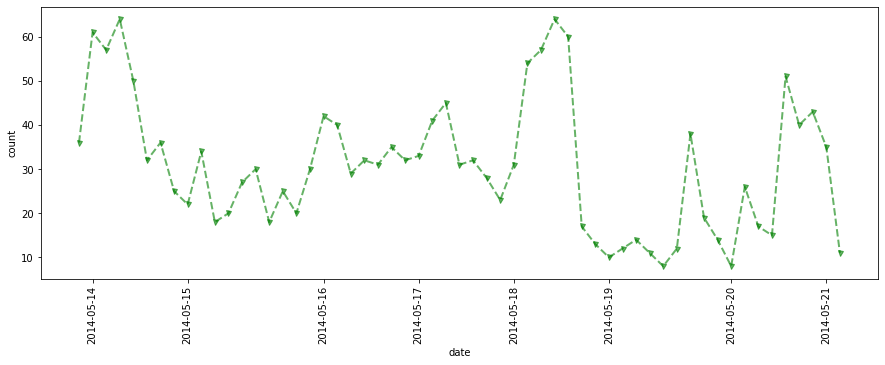

In [215]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(cd.index,cd["count"],c="g",alpha=0.6,marker="v",ms=5,linestyle="--",linewidth=2)
ax.set_xlabel("date")
ax.set_xticklabels(cd.index,rotation=90)
ax.set_ylabel("count")
plt.show

## Pie charts

In [234]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

In [185]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer. 

In [240]:
ctd = pd.DataFrame(cities.head(30))
ctd.columns=["count"]
ctd

,count
Barcelona,632
Lisbon,158
Tübingen,131
Prague,97
Istanbul,94
Athens,67
Krakow,58
Porto,58
Freiburg,54
Kotor,51


<function matplotlib.pyplot.show(close=None, block=None)>

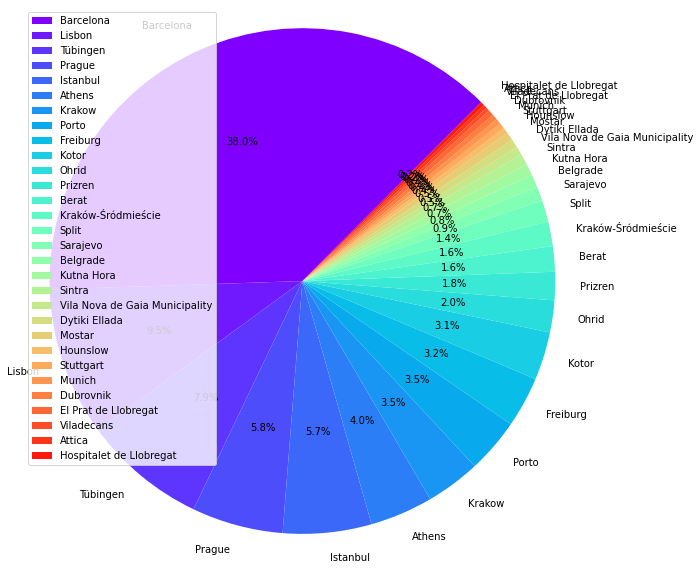

In [242]:
fig,ax=plt.subplots(figsize=(10,10))
colors = cm.rainbow(np.arange(len(ctd["count"]))/len(ctd["count"]))
ax.pie(ctd["count"], labels=ctd.index, autopct='%1.1f%%', startangle=45,colors=colors)
ax.axis('equal')
proptease = fm.FontProperties()
proptease.set_size('xx-small')
ax.legend(ctd.index, loc=2)
plt.show

Maps

In [ ]:
# Q7: Can you draw a map based on the latitude and lognitude of the cities? 

In [263]:
import folium
import pandas as pd

world_map = folium.Map()
world_map

In [301]:
city=df[["lat","lon","city"]]
city

,lat,lon,city
date,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow
...,...,...,...
2014-07-09 13:13:00,48.356013,11.791710,Munich
2014-07-09 13:14:00,48.356529,11.792183,Munich
2014-07-09 13:17:00,48.356285,11.791710,Munich


In [302]:
city=city.set_index('city')
city

,lat,lon
city,,
West Drayton,51.481292,-0.451011
Hounslow,51.474005,-0.450999
Hounslow,51.478199,-0.446081
Hounslow,51.478199,-0.446081
Hounslow,51.474146,-0.451562
...,...,...
Munich,48.356013,11.791710
Munich,48.356529,11.792183
Munich,48.356285,11.791710
